In [2]:
import requests
import pandas as pd
from pathlib import Path
from investment_tools.fmp import FinancialData, ManualAnalysis, Company
from matplotlib import pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from IPython.display import clear_output

key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()
    

yf.pdr_override()

Checking matching frame indecies
Financial statement lengths are BS: 38, IS:38, CFS:34, Ratios:35
Financial statement lengths are now each: 34
[*********************100%***********************]  1 of 1 completed
Path already exists. Overwriting saved data.
There were 0/34 values in ebitdaratio that exceed the 0.05 error tolerance.
There were 0/34 values in grossProfitRatio that exceed the 0.05 error tolerance.
There were 0/34 values in operatingIncomeRatio that exceed the 0.05 error tolerance.
There were 0/34 values in incomeBeforeTaxRatio that exceed the 0.05 error tolerance.
There were 1/34 values in netIncomeRatio that exceed the 0.05 error tolerance.
There were 0/34 values in eps that exceed the 0.05 error tolerance.
There were 0/34 values in grossProfitMargin that exceed the 0.05 error tolerance.
There were 0/34 values in operatingProfitMargin that exceed the 0.05 error tolerance.
There were 0/34 values in currentRatio that exceed the 0.05 error tolerance.
There were 0/34 values i

C:\Users\John\Desktop\Git\investment-tools\investment_tools\fmp\fmp_layer_1.py:588: RuntimeWarning: invalid value encountered in double_scalars
  col_data.append((series[i]-series[i-span])/abs(series[i-span]))
C:\Users\John\Desktop\Git\investment-tools\investment_tools\fmp\fmp_layer_1.py:588: RuntimeWarning: divide by zero encountered in double_scalars
  col_data.append((series[i]-series[i-span])/abs(series[i-span]))
C:\Users\John\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\John\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


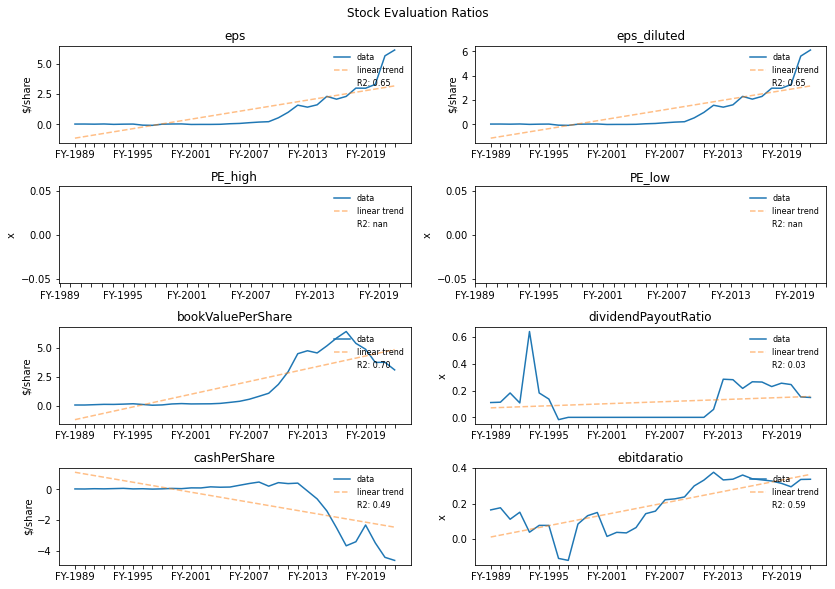

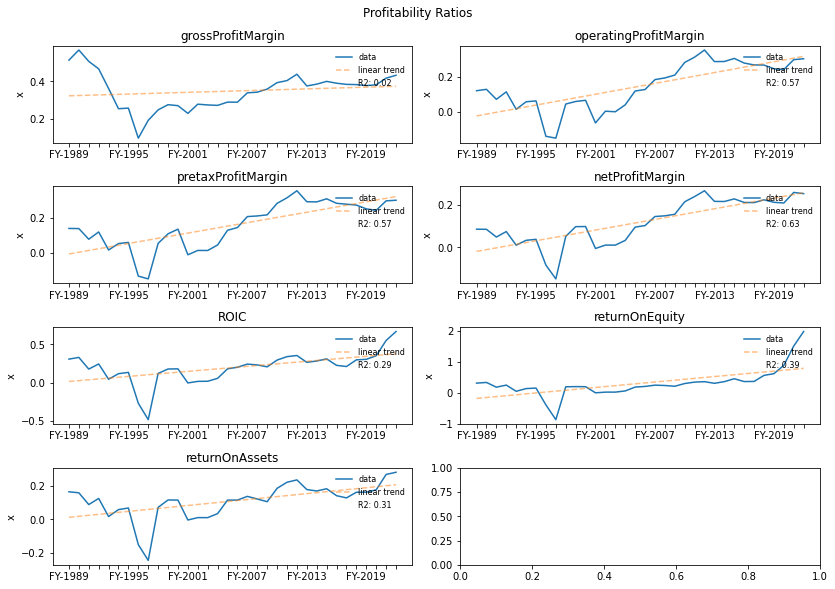

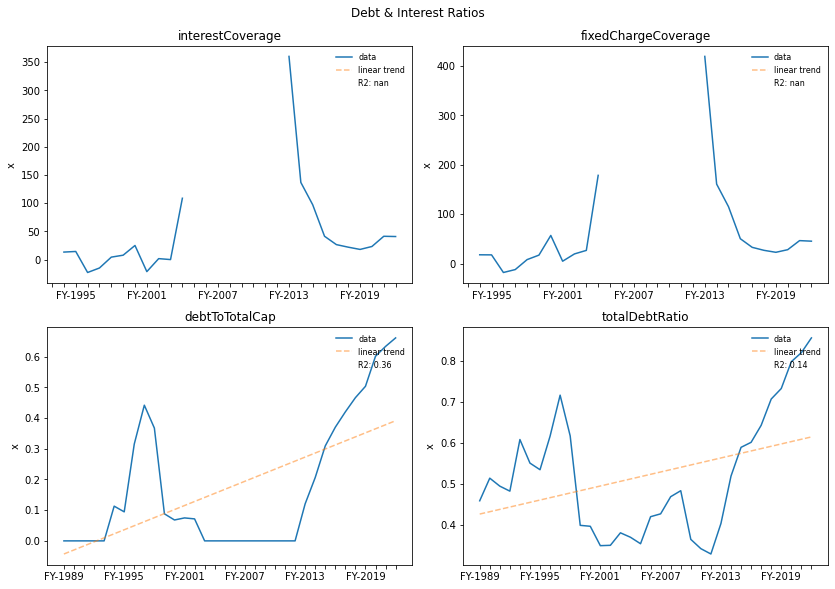

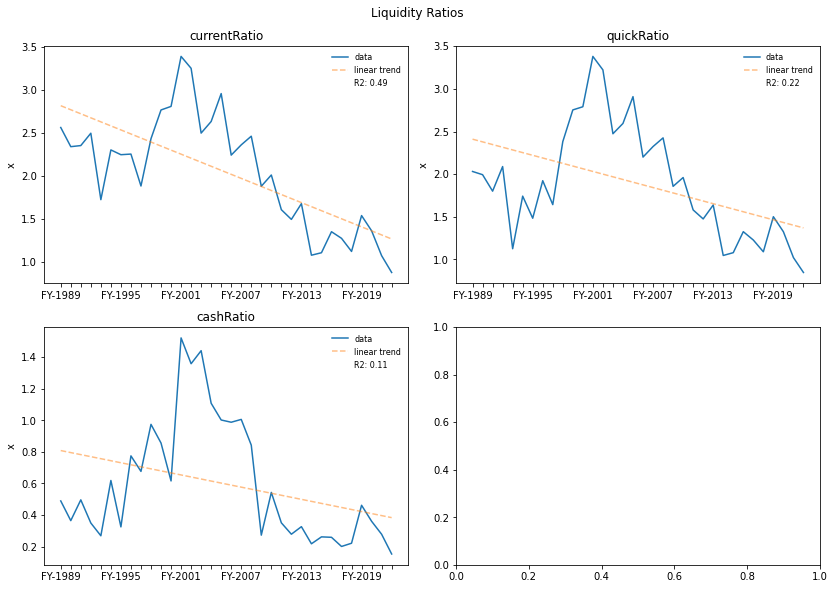

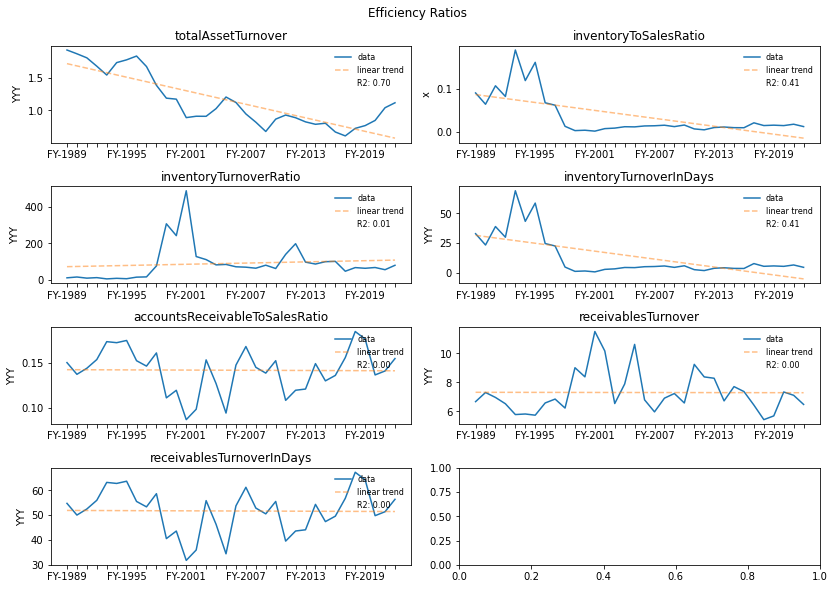

In [3]:
a = Company('AAPL', api_key=api_key, period='annual', data='online', limit=120,
           verbose=True)
#ZTS 

In [4]:
a._financial_data.stock_price_data

high        low  avg_close
0   11.284567   7.939340   9.748020
1   17.930420  10.080285  14.592130
2   27.662802  15.432649  20.917906
3   45.263157  24.174845  31.708084
4   54.041035  30.990187  39.585352
5   85.289917  44.085636  65.461401
6   76.735062  21.882248  44.463666
7   74.219444  43.773418  62.407644
8   93.300621  54.353256  76.299852
9   86.859947  53.407673  67.056341
10  71.846565  50.472794  62.424578
11  65.084747  49.652096  59.876746
12  65.932205  37.109722  48.792143
13  37.198929  16.467440  26.427703
14  37.279217  24.487064  31.464573
15  46.538803  31.543264  39.853199
16  52.176628  38.528099  44.774309
17  52.649422  26.565565  43.274748
18  73.211418  41.837646  56.981012
19  71.810883  46.280106  58.472420

In [3]:
a.scores

{'eps_growth': {'score': 4, 'strength': 0},
 'returnOnEquity_growth': {'score': 4, 'strength': 0},
 'ROIC_growth': {'score': 4, 'strength': 0},
 'returnOnAssets_growth': {'score': 4, 'strength': 0},
 'debtToTotalCap_growth': {'score': 4, 'strength': 0},
 'totalDebtRatio_growth': {'score': 4, 'strength': 0}}

In [5]:
a.metrics['eps_growth']

index
BHP-FY-2003   NaN
BHP-FY-2004   NaN
BHP-FY-2005   NaN
BHP-FY-2006   NaN
BHP-FY-2007   NaN
BHP-FY-2008   NaN
BHP-FY-2009   NaN
BHP-FY-2010   NaN
BHP-FY-2011   NaN
BHP-FY-2012   NaN
BHP-FY-2013   NaN
BHP-FY-2014   NaN
BHP-FY-2015   NaN
BHP-FY-2016   NaN
BHP-FY-2017   NaN
BHP-FY-2018   NaN
BHP-FY-2019   NaN
BHP-FY-2020   NaN
BHP-FY-2021   NaN
BHP-FY-2022   NaN
Name: eps_growth, dtype: float64

In [7]:
a.mea']

index
BHP-FY-2003     0.500
BHP-FY-2004     0.880
BHP-FY-2005     2.080
BHP-FY-2006     3.464
BHP-FY-2007     4.590
BHP-FY-2008     5.506
BHP-FY-2009     2.112
BHP-FY-2010     4.572
BHP-FY-2011     8.582
BHP-FY-2012     5.792
BHP-FY-2013     4.088
BHP-FY-2014     5.200
BHP-FY-2015     0.718
BHP-FY-2016    -2.400
BHP-FY-2017     2.214
BHP-FY-2018     1.392
BHP-FY-2019     3.206
BHP-FY-2020     3.146
BHP-FY-2021     4.470
BHP-FY-2022    12.212
Name: eps, dtype: float64

In [3]:
def tradable_tickers():
    url = f'https://financialmodelingprep.com/api/v3/available-traded/list?apikey={api_key}'
    data = requests.get(url)
    data = sort_json_ticker_data(data.json())
    return data

def sort_json_ticker_data(data):
    return_dict = dict()
    for dct in data:
        if dct['exchange'] not in return_dict.keys():
            return_dict[dct['exchange']] = [dct['symbol']]
        else:
            return_dict[dct['exchange']].append(dct['symbol'])

    return return_dict

ticker_list = tradable_tickers()

In [4]:
ticker_list.keys()

dict_keys(['XETRA', 'London Stock Exchange', 'Swiss Exchange', 'Amsterdam', 'New York Stock Exchange', 'HKSE', 'Other OTC', 'Tokyo', 'Nasdaq', 'Stuttgart', 'NASDAQ Global Market', 'Tel Aviv', 'Taipei Exchange', 'Copenhagen', 'Taiwan', 'Athens', 'Vienna', 'Madrid Stock Exchange', 'Mexico', 'Australian Securities Exchange', 'NASDAQ Capital Market', 'Paris', 'New York Stock Exchange Arca', 'Canadian Sec', 'Toronto Stock Exchange', 'Shenzhen', 'Istanbul Stock Exchange', 'Milan', 'Saudi', 'Shanghai', 'NASDAQ Global Select', 'Thailand', 'Jakarta Stock Exchange', 'National Stock Exchange of India', 'Irish', 'São Paulo', 'American Stock Exchange', 'Qatar', 'TSXV', 'Frankfurt', 'BATS', 'Helsinki', 'KSE', 'Stockholm Stock Exchange', 'Oslo Stock Exchange', 'Warsaw Stock Exchange', 'Brussels', 'YHD', 'NEO', 'SES', 'NZSE', 'Johannesburg', 'Kuala Lumpur', 'Santiago', 'Budapest', 'Lisbon', '', 'Dubai', 'Munich', 'Iceland', 'Berlin', 'KOSDAQ', 'IOB', 'BSE', 'Nasdaq Capital Market', 'Aquis AQSE', 'FTSE

In [8]:
ticker_scan = (ticker_list['New York Stock Exchange'][100:200])

Ticker ZTR


KeyboardInterrupt: 

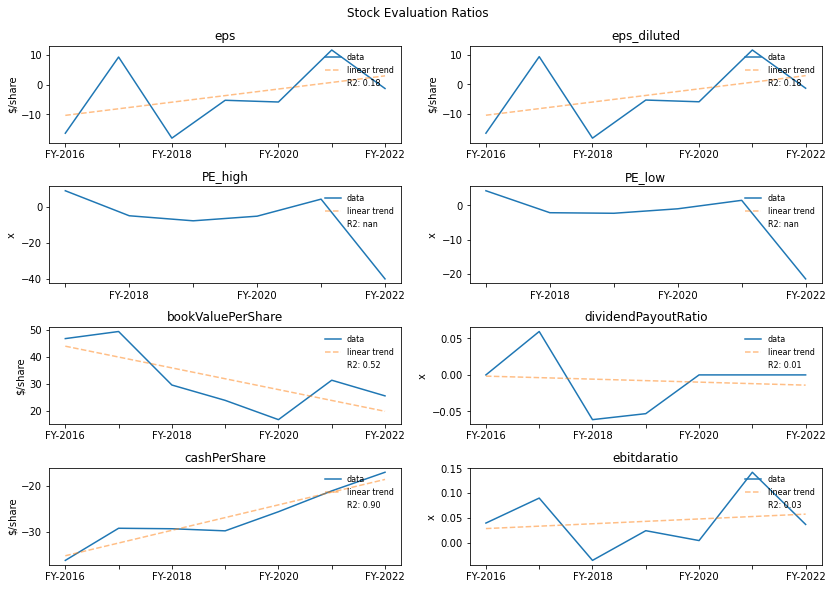

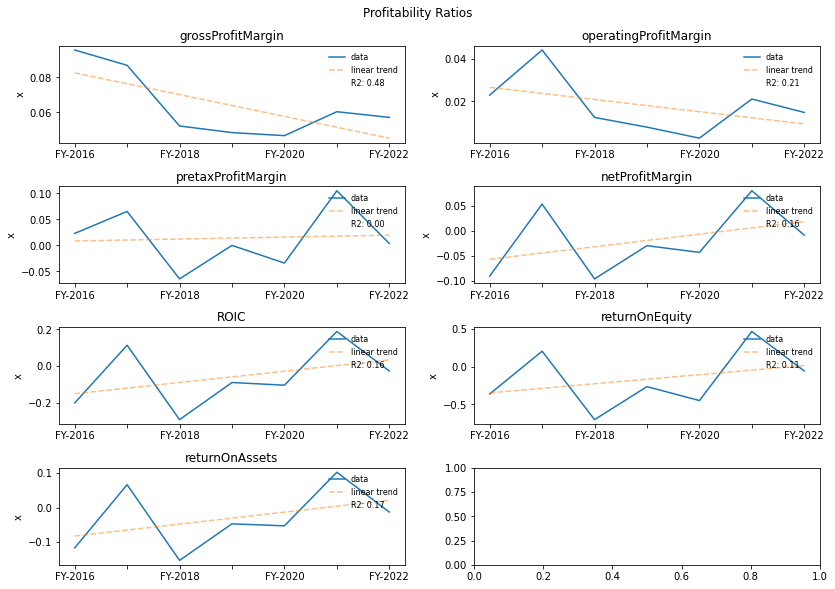

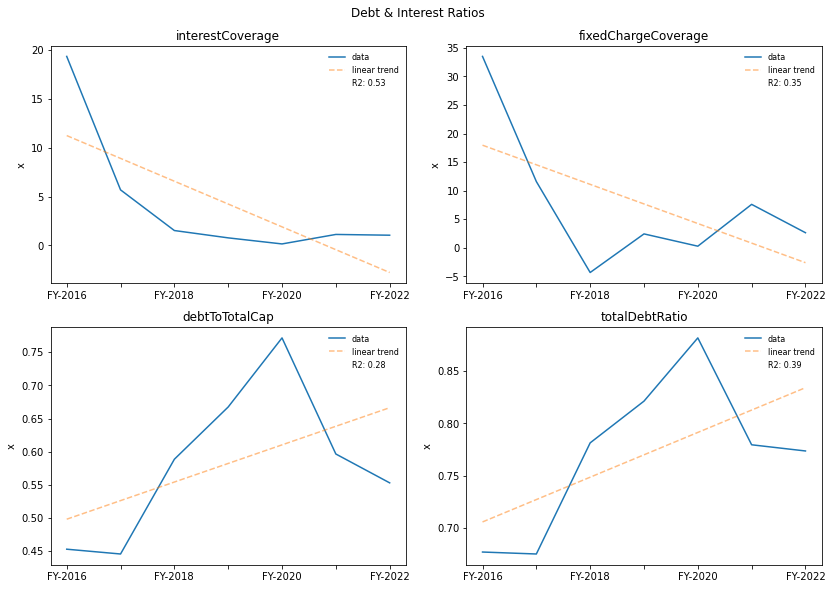

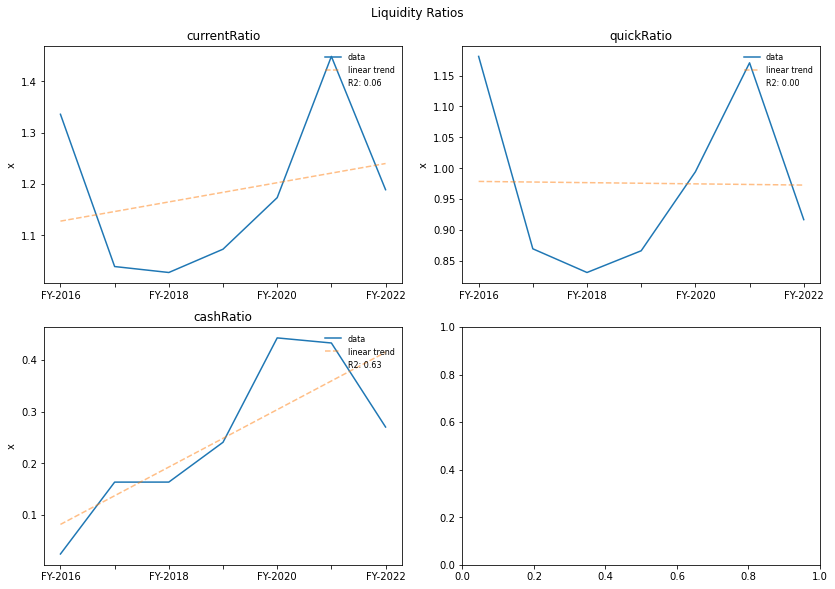

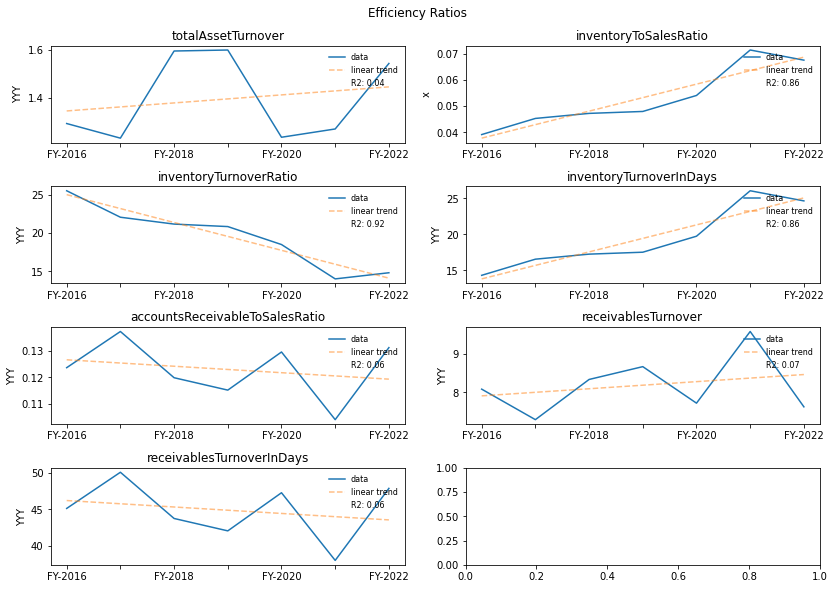

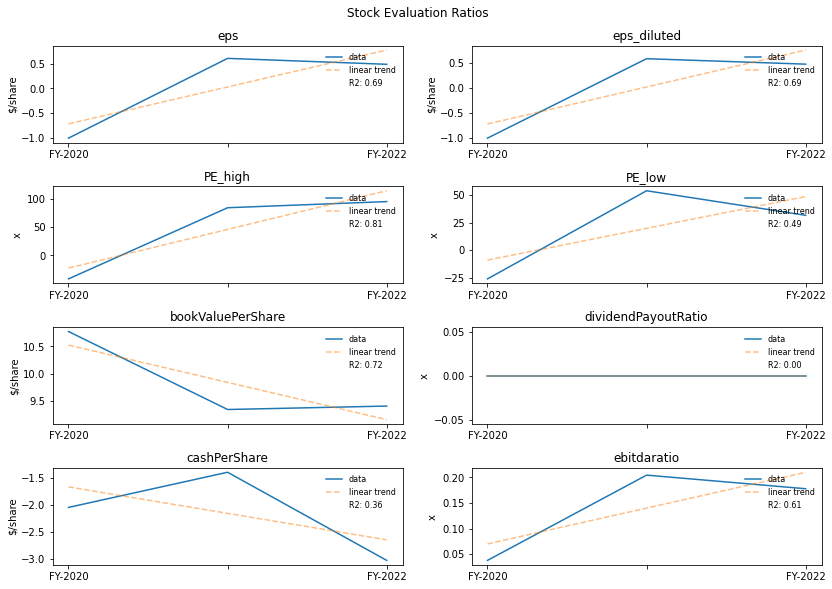

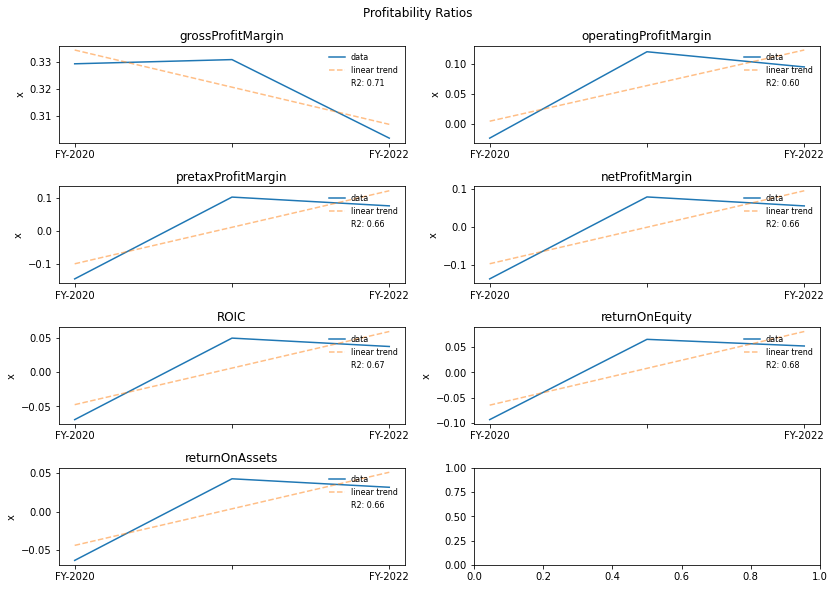

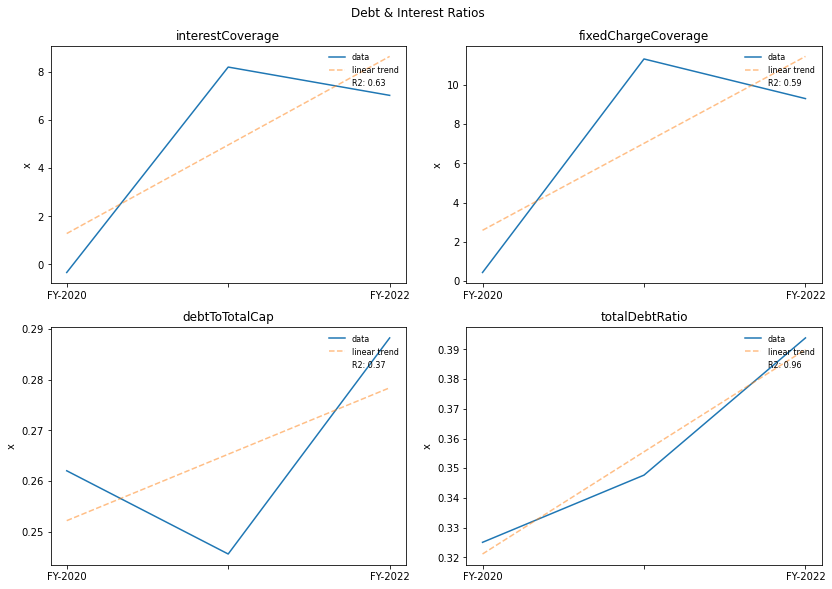

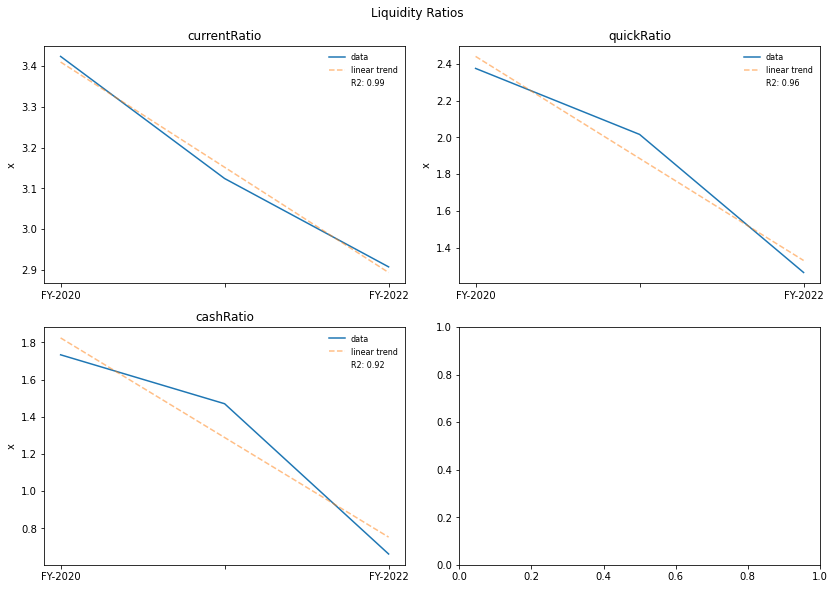

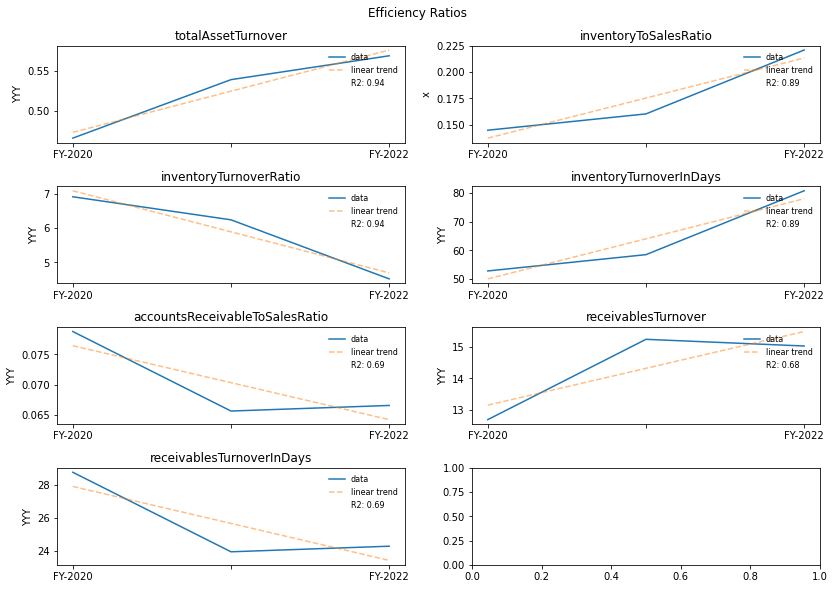

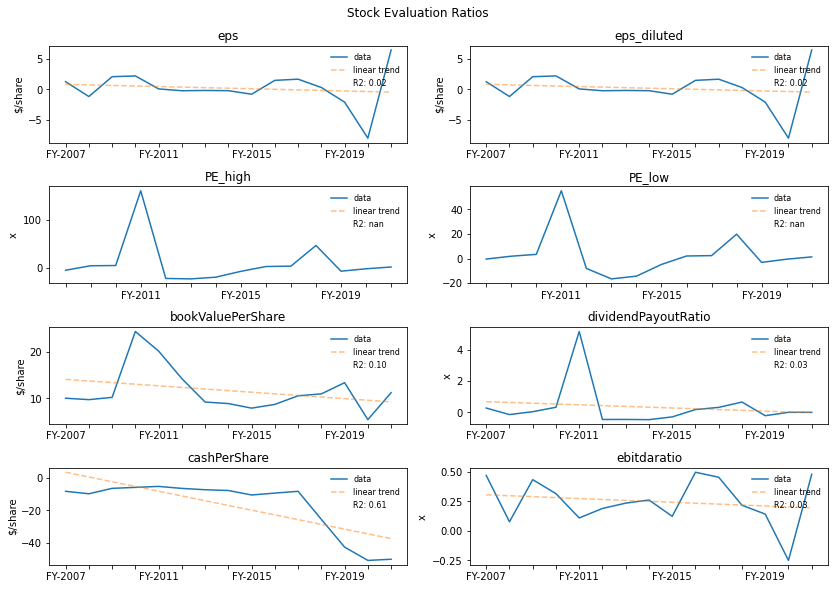

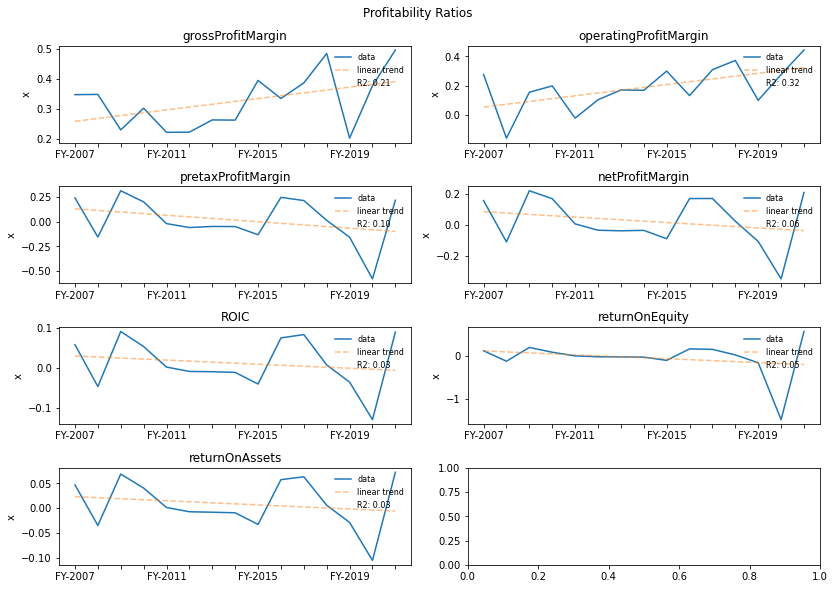

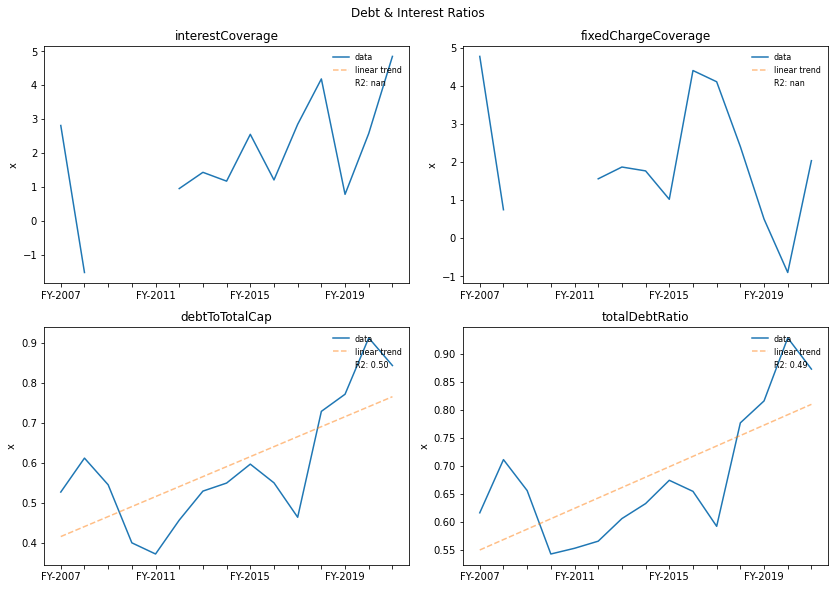

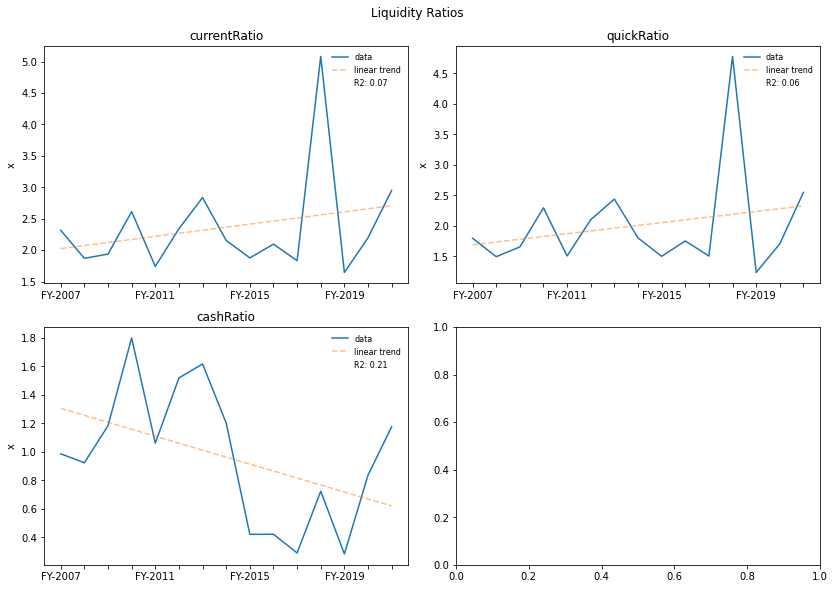

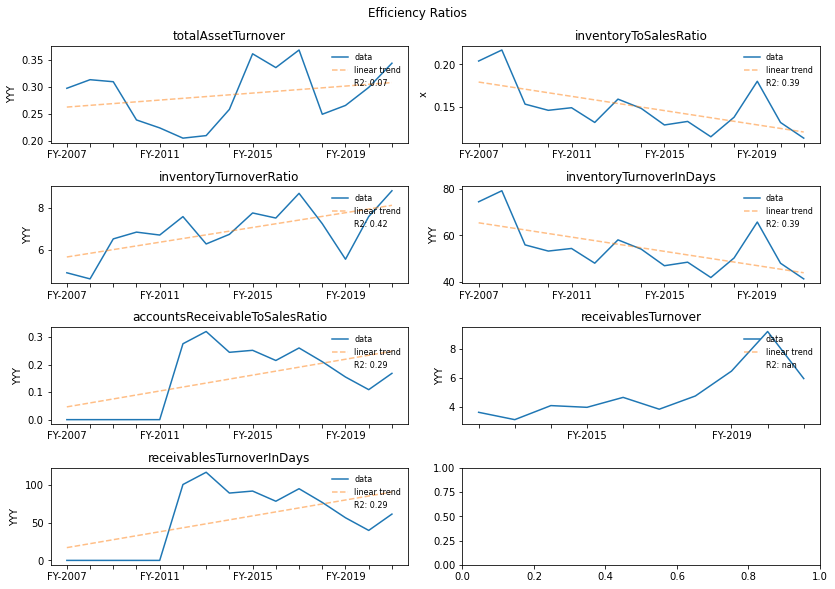

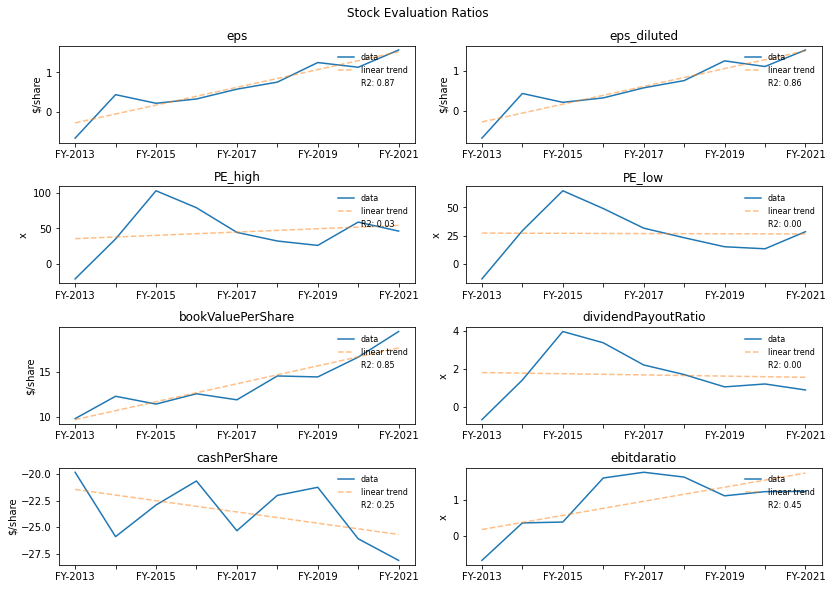

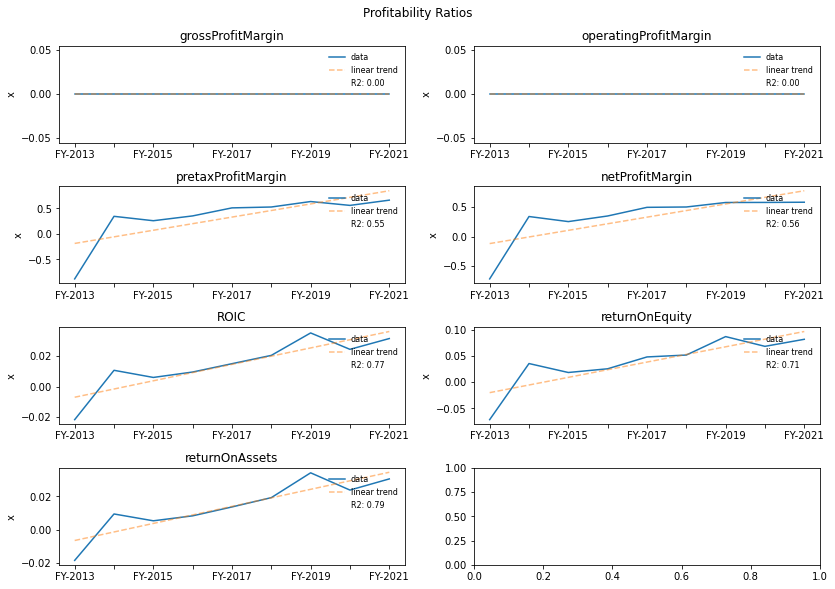

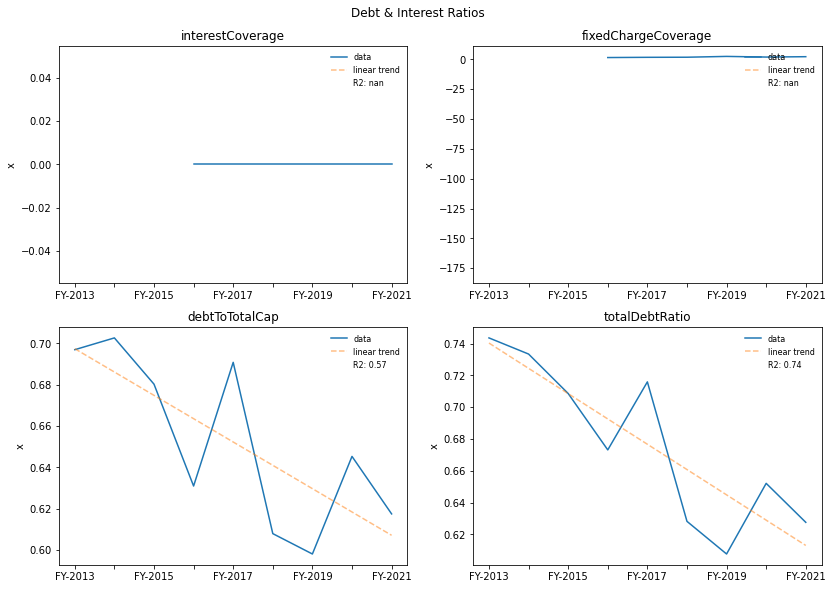

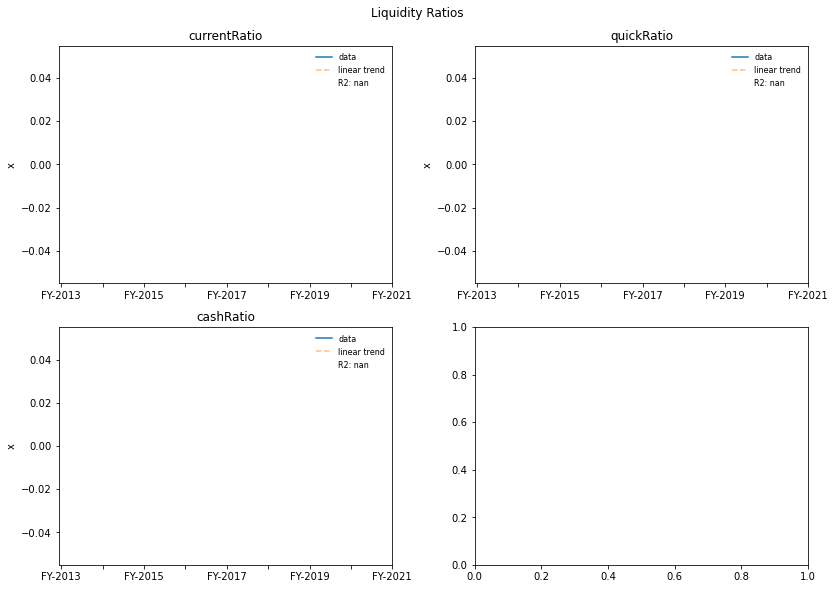

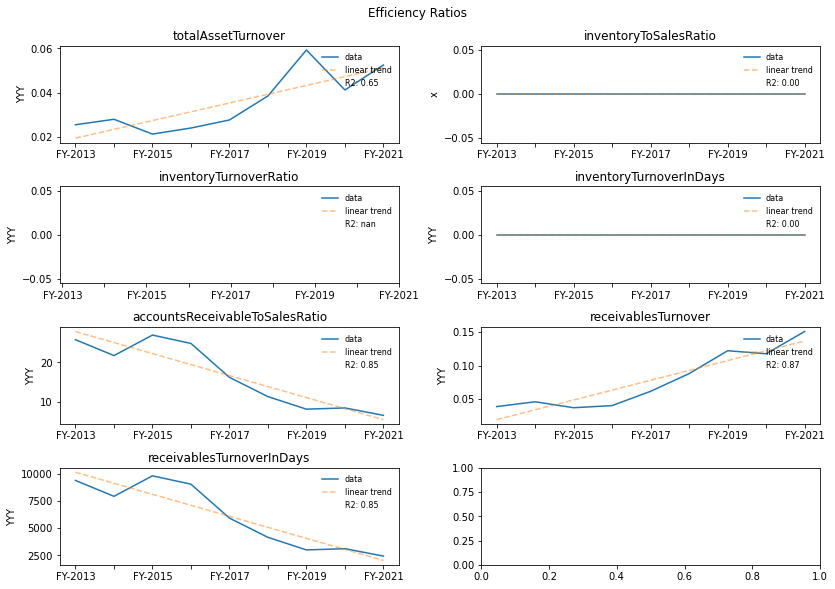

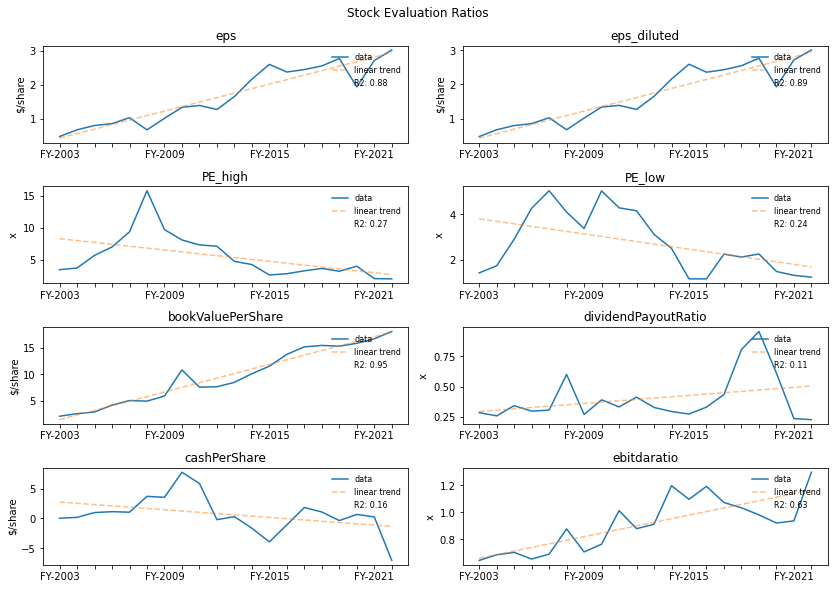

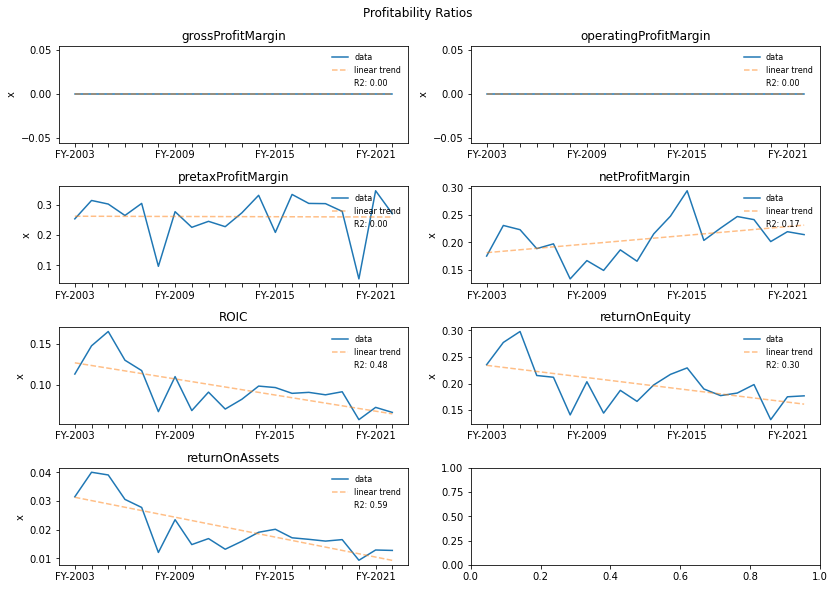

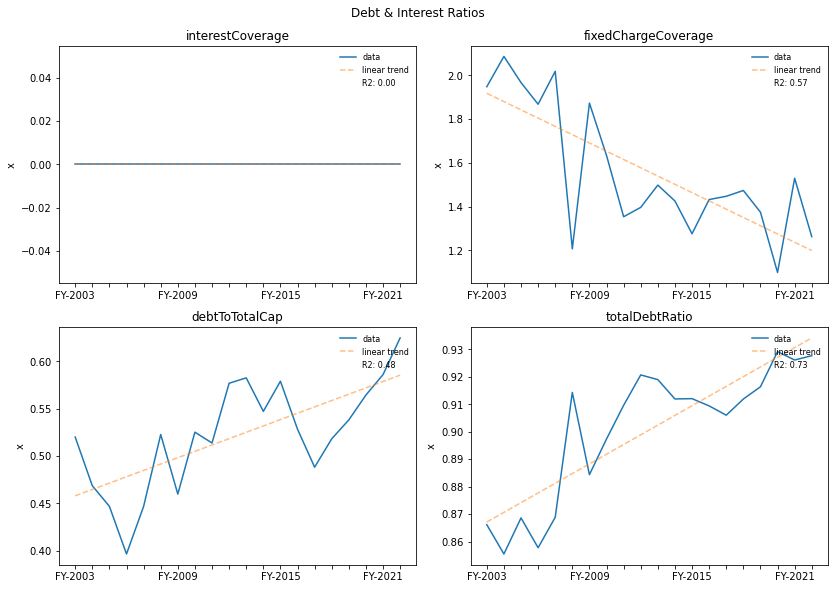

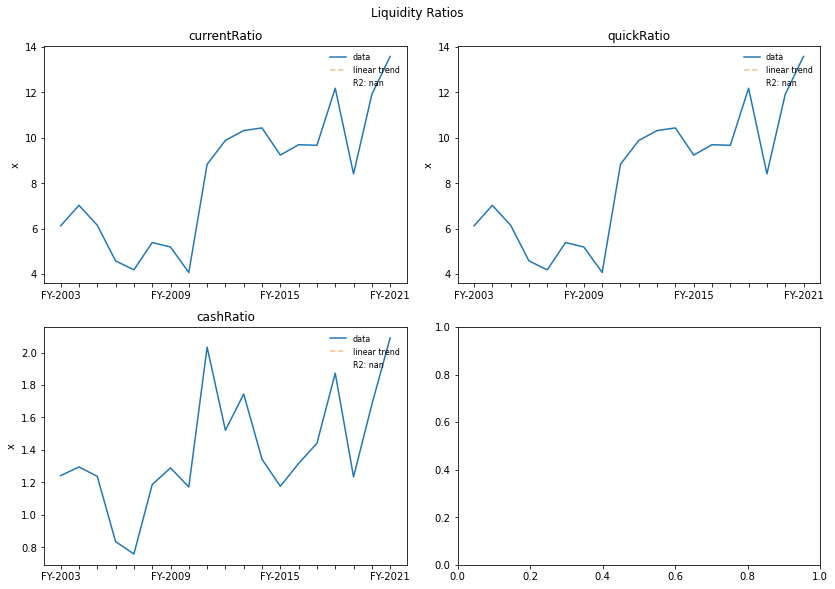

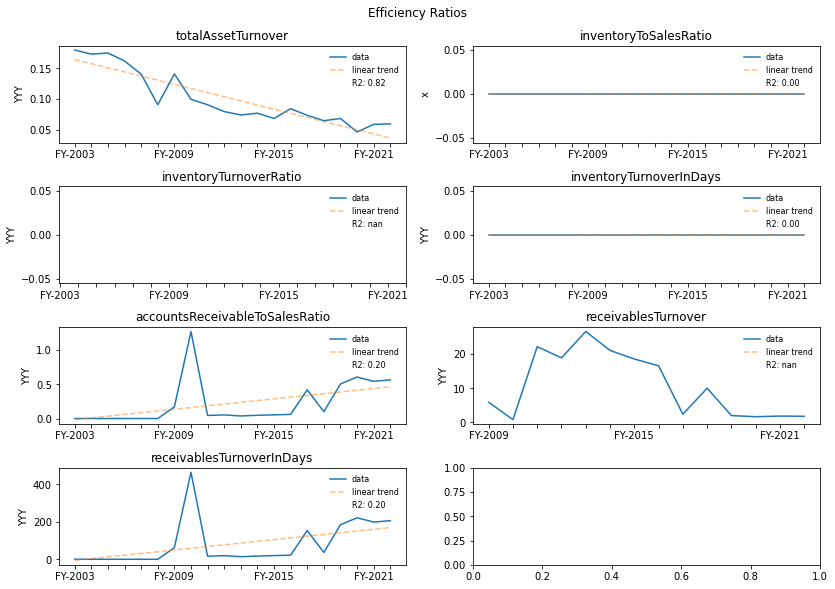

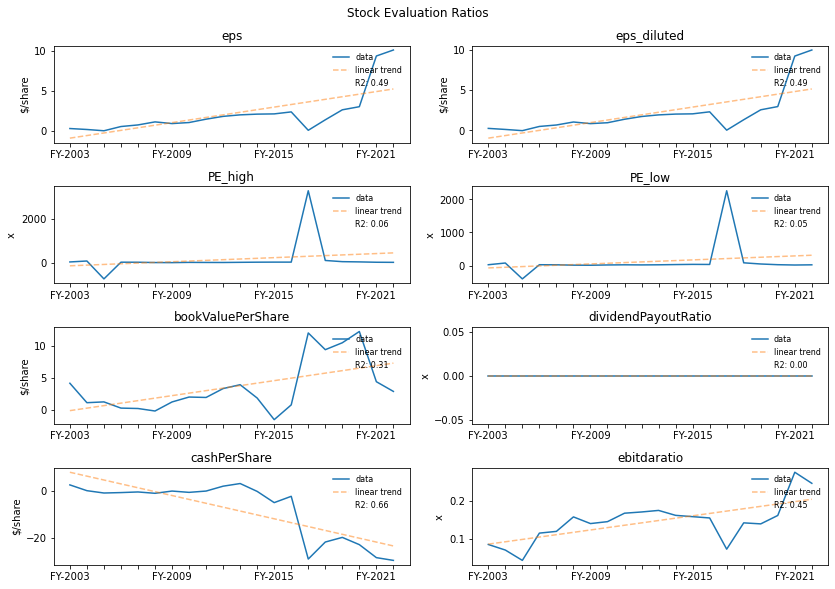

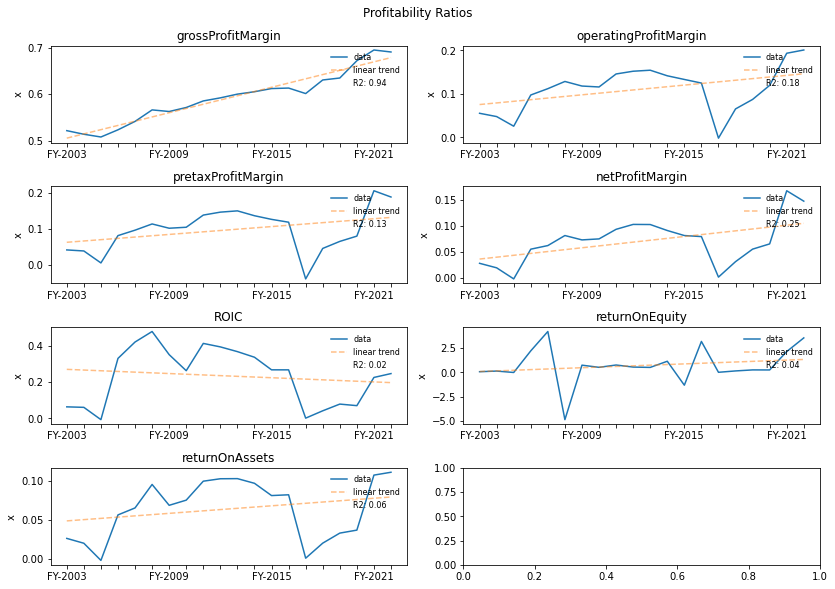

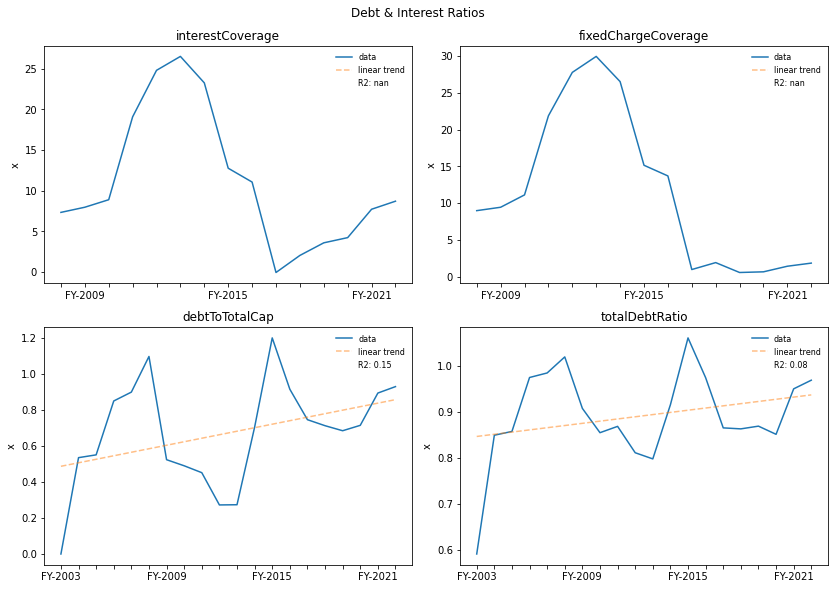

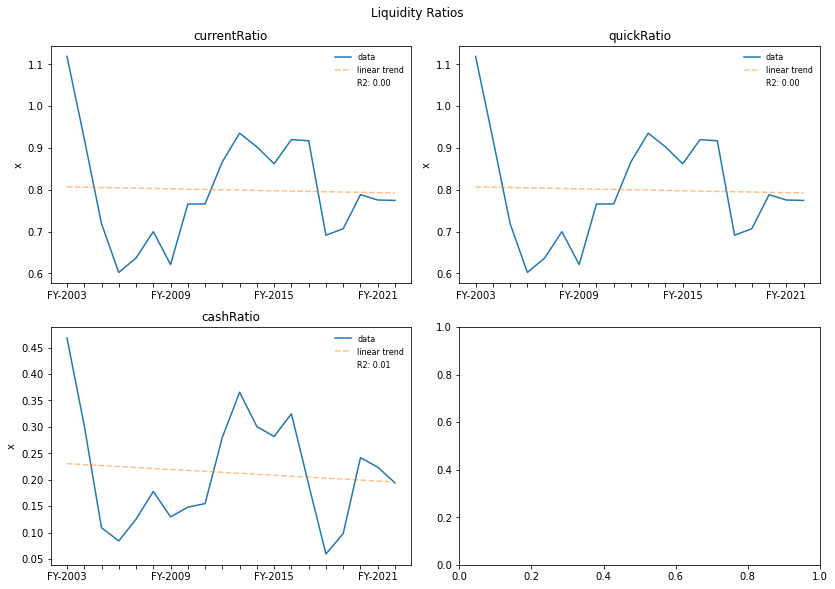

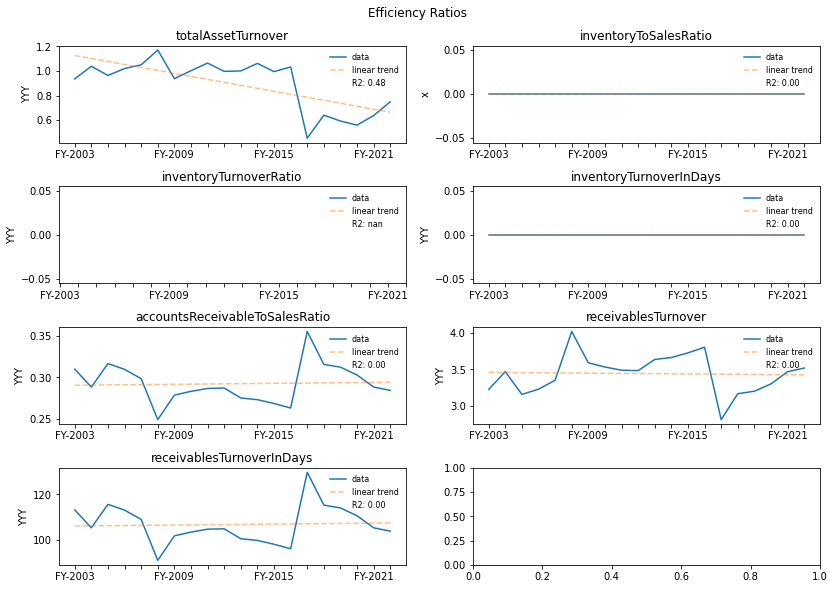

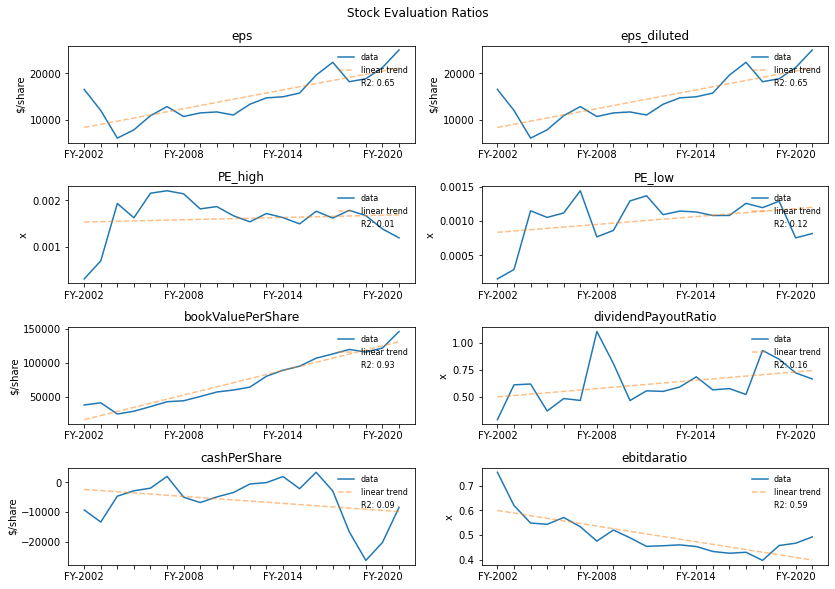

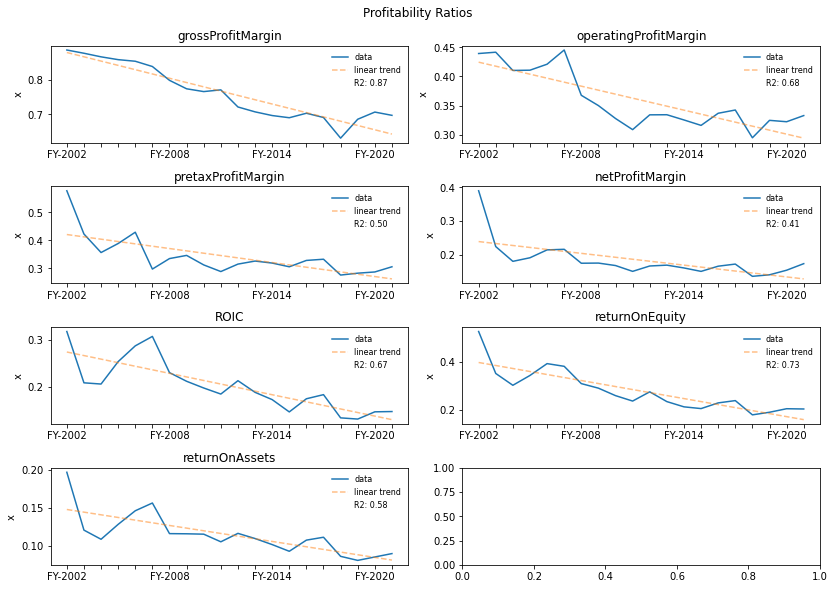

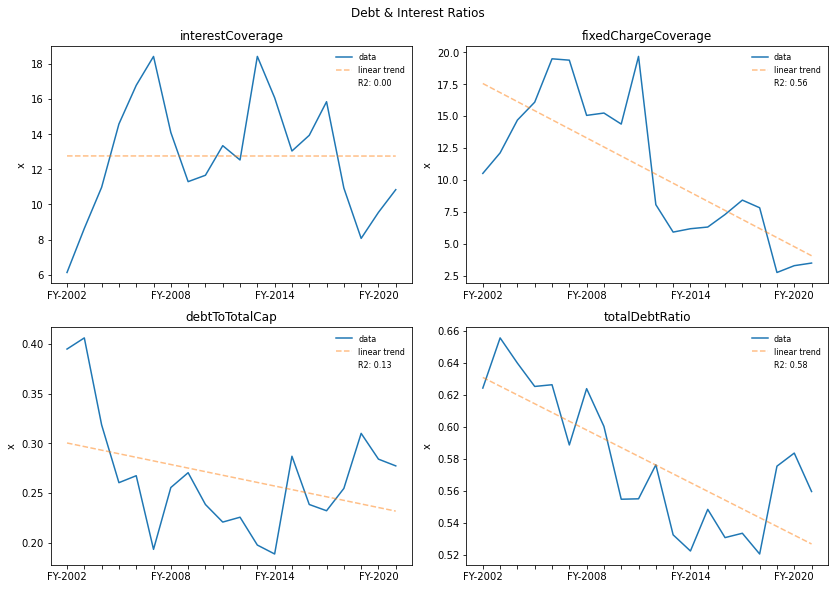

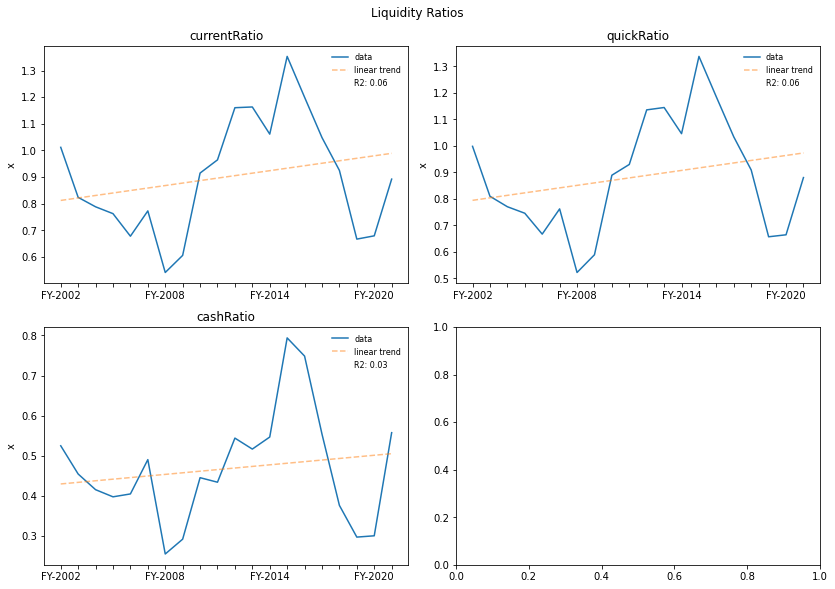

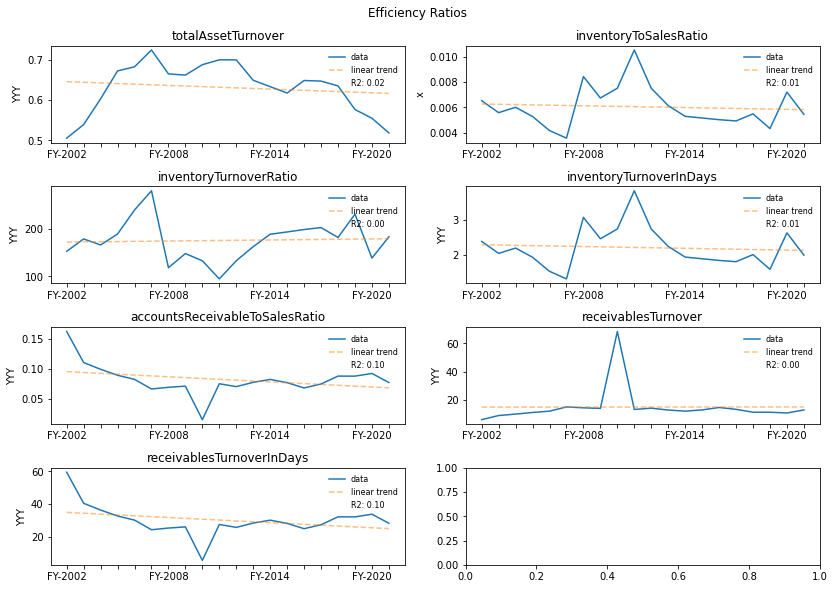

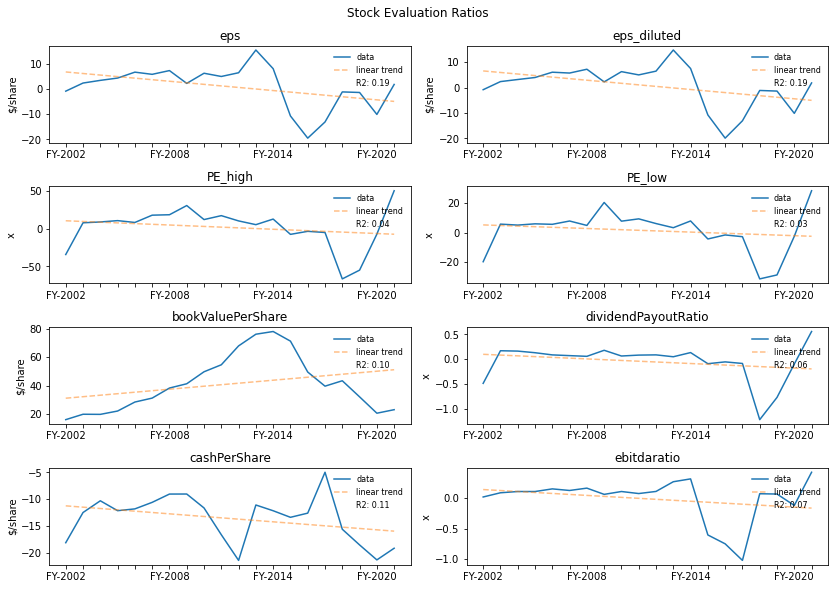

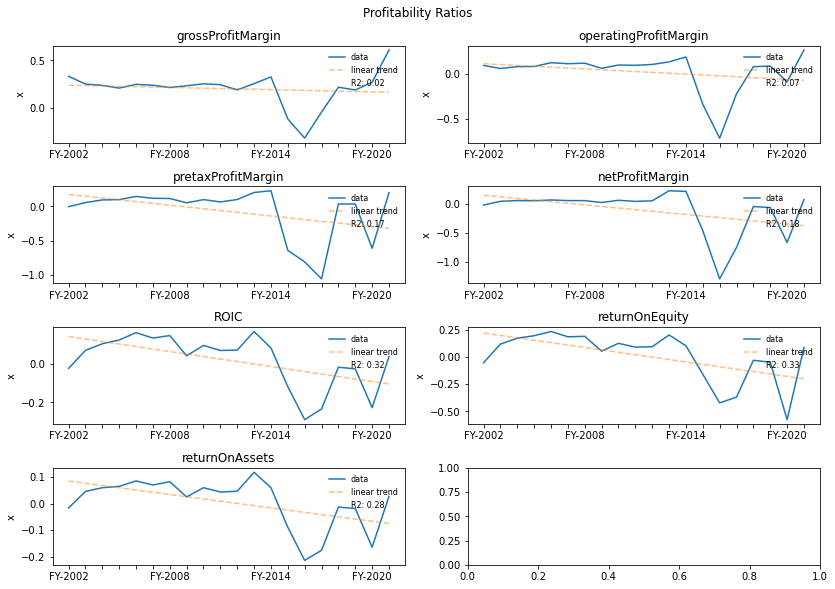

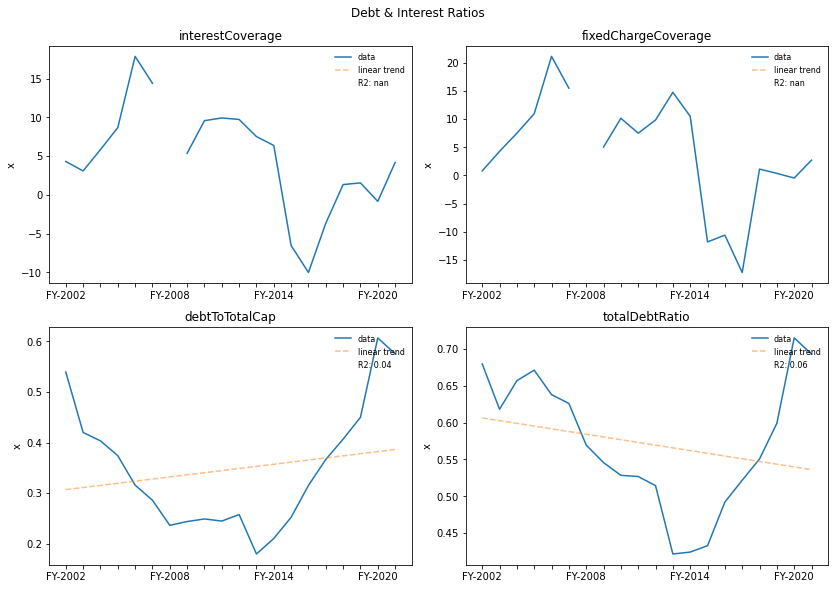

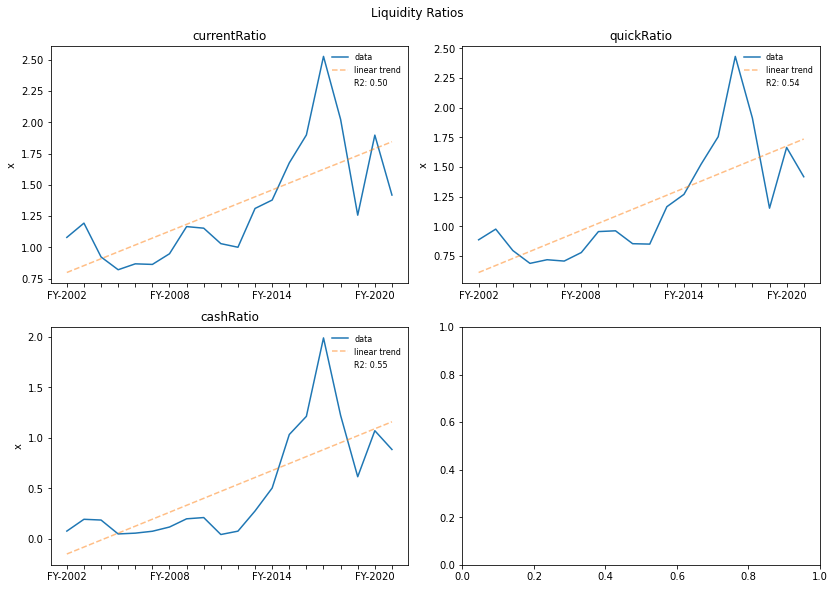

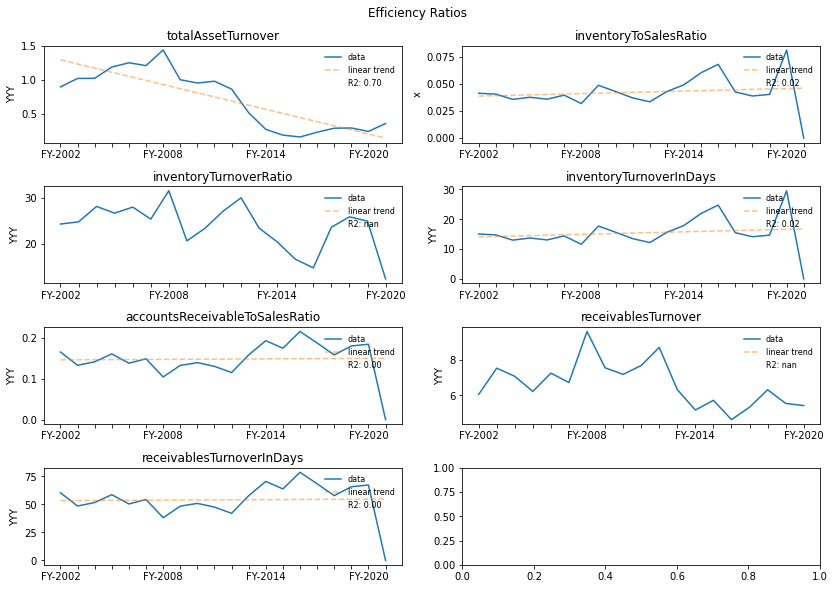

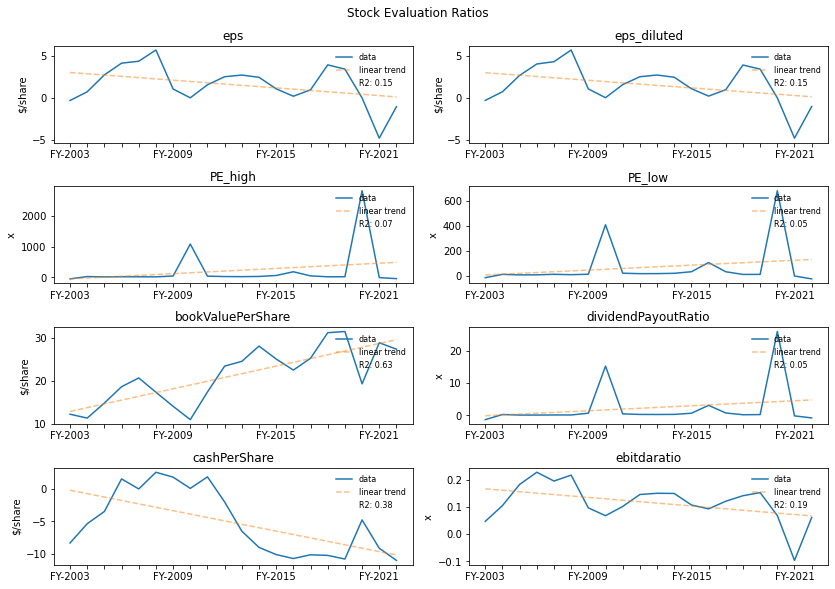

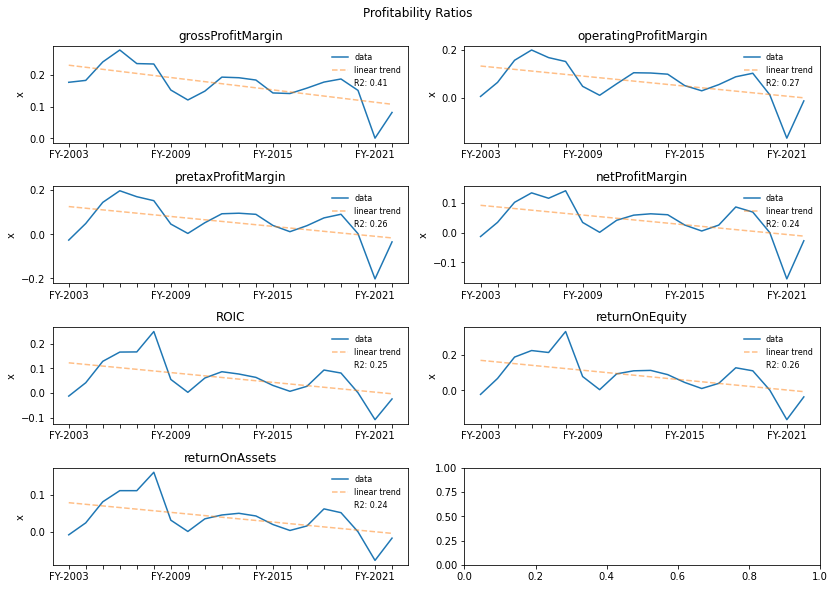

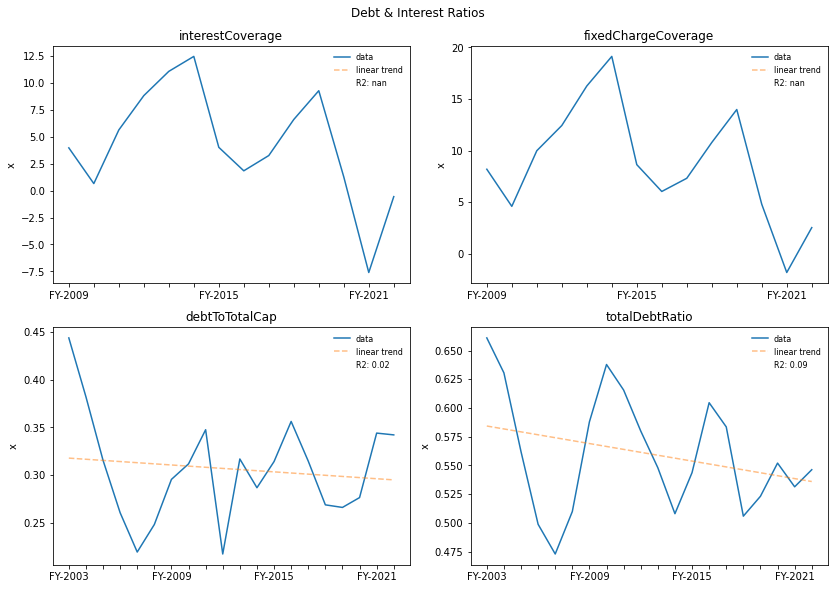

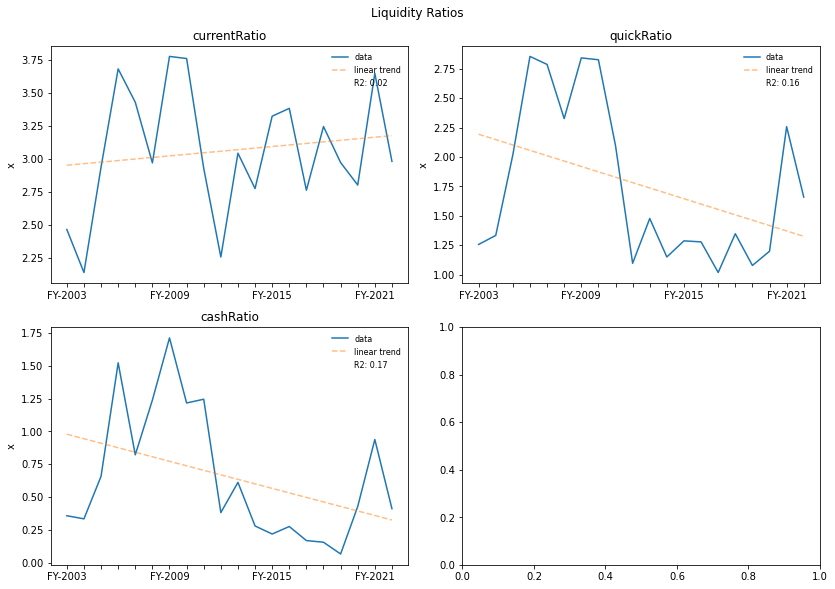

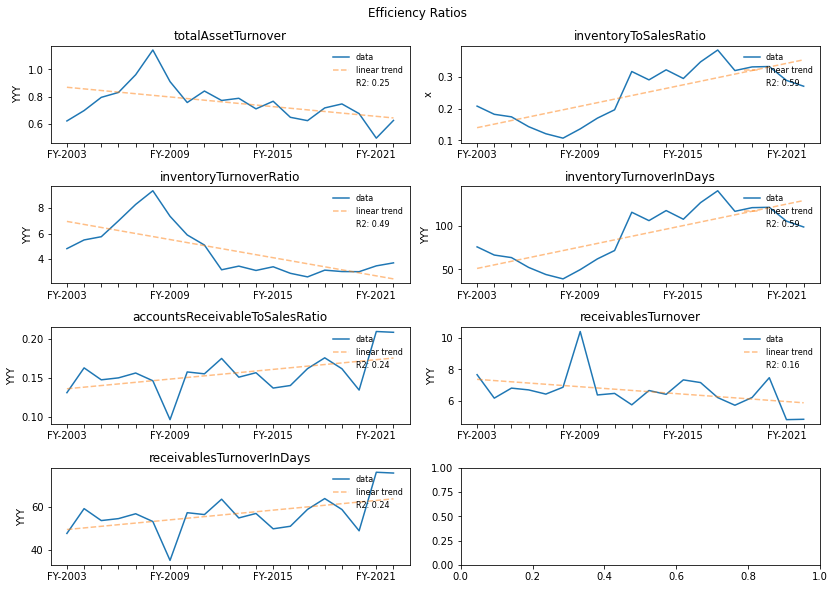

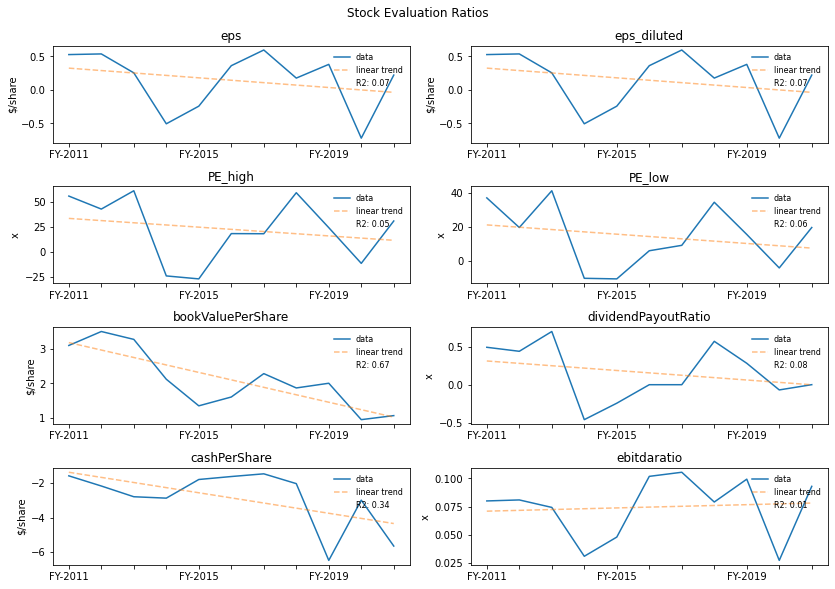

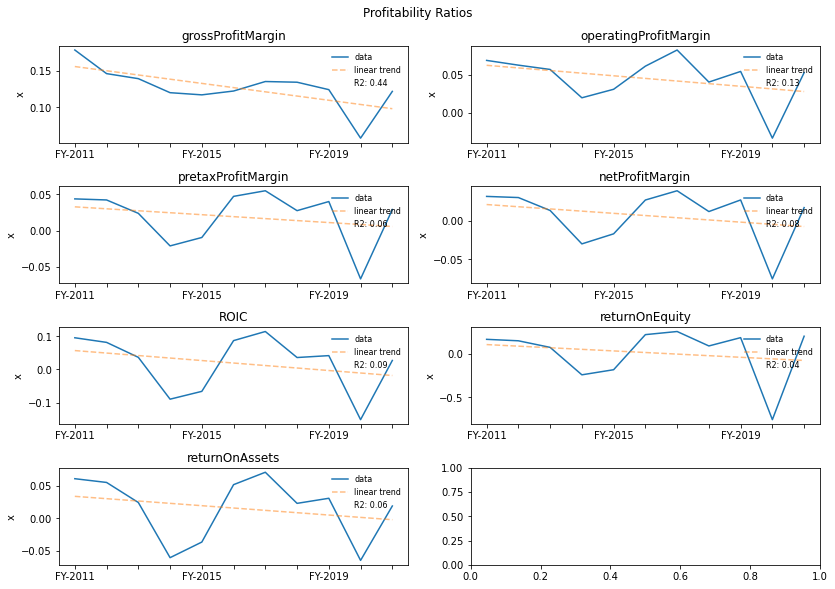

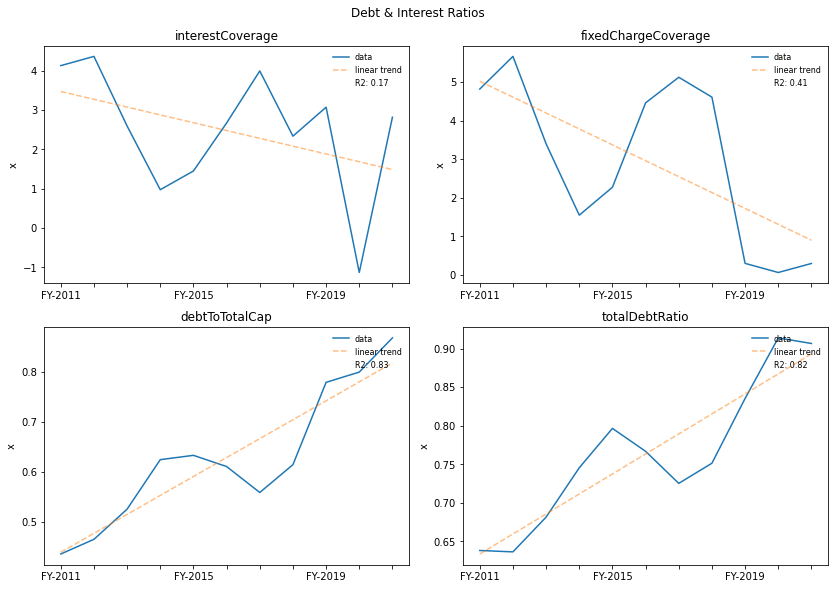

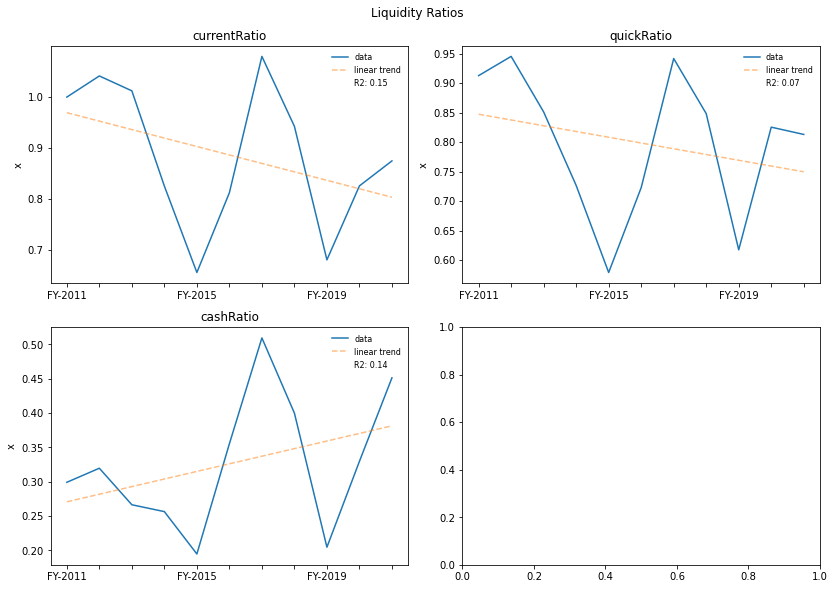

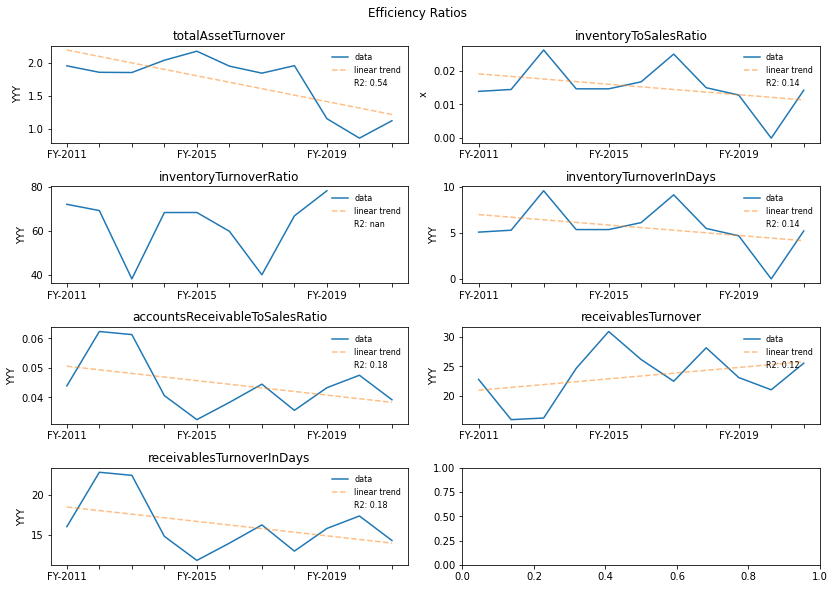

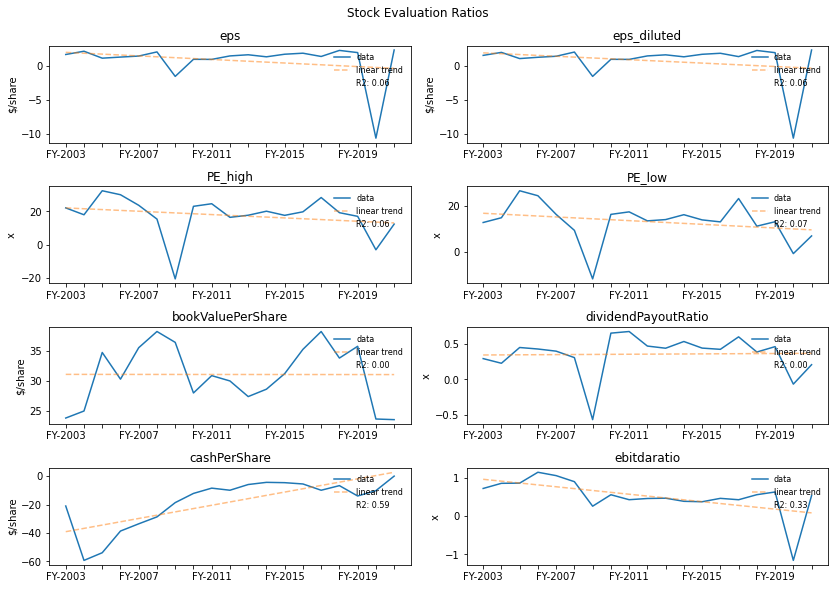

In [ ]:
for ticker in ticker_scan:
    try:
        clear_output()
        print(f"Ticker {ticker}")
        Company(ticker, api_key)
    except AssertionError:
        pass

        


In [7]:
ticker_scan.index('PERF-WT')

0

In [18]:
company = 'RONI-UN'
period='annual'
limit=20
balance_sheets = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period={period}&limit={limit}&apikey={api_key}')

In [19]:
balance_sheets.json()

[{'date': '2021-12-31',
  'symbol': 'RONI-UN',
  'reportedCurrency': 'USD',
  'cik': '0001845437',
  'fillingDate': '2022-03-30',
  'acceptedDate': '2022-03-30 16:00:54',
  'calendarYear': '2021',
  'period': 'FY',
  'cashAndCashEquivalents': 2570409,
  'shortTermInvestments': 0,
  'cashAndShortTermInvestments': 2570409,
  'netReceivables': 7960,
  'inventory': 0,
  'otherCurrentAssets': 746720,
  'totalCurrentAssets': 3325089,
  'propertyPlantEquipmentNet': 0,
  'goodwill': 0,
  'intangibleAssets': 0,
  'goodwillAndIntangibleAssets': 0,
  'longTermInvestments': 0,
  'taxAssets': 0,
  'otherNonCurrentAssets': 345044341,
  'totalNonCurrentAssets': 345044341,
  'otherAssets': 0,
  'totalAssets': 348369430,
  'accountPayables': 143405,
  'shortTermDebt': 0,
  'taxPayables': 0,
  'deferredRevenue': 0,
  'otherCurrentLiabilities': 375918,
  'totalCurrentLiabilities': 519323,
  'longTermDebt': 0,
  'deferredRevenueNonCurrent': 0,
  'deferredTaxLiabilitiesNonCurrent': 0,
  'otherNonCurrentLia

In [17]:
ticker_scan.index('RONI-UN')

2

In [13]:
y = a.metrics['ROIC_growth'].copy().dropna()
x = range(len(y))

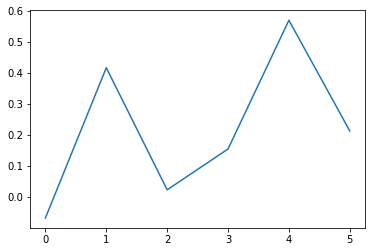

In [14]:
plt.plot(x,y)

In [9]:
from scipy.stats import linregress
xx, yy, r, _, _ = linregress(x, y)

In [10]:
r**2

0.30657525911175687

In [11]:
r

0.5536923867200604

In [4]:
import datetime

In [3]:
'{}'.format(1)

'1'

In [ ]:
https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter&limit=400&apikey=85d4c0eecd5700626cc5dc37dda9125c